In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm, trange

folder_name= r'\\172.16.251.125\Inscopix\Francesco\DLC FOLDER\Input Folder 2' # <---- INSERT DIRECTORY NAME AS A STRING



def led_time(behavioural_video):
    """Find frame that an LED is switched on
    INPUT:
    - behavioural_video = the video being analysed
    
    OUTPUT:
    - trial_starts - list containing all trial starts
    - trial_ends - list containing all trial ends"""
    
    #Read in video
    cap = cv2.VideoCapture(behavioural_video)
    light_list=[]
    frame = 1 #Start Frame number
     # find trial start or trial end
    
    duration = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.set(1, 0)
    bkg= cap.read()[1]
    bkg = cv2.cvtColor(bkg, cv2.COLOR_BGR2GRAY)
    
    with tqdm(total=duration-20) as pbar:
        for frame in range(duration-20):
            cap.set(1, frame+1)
            pixels = cap.read()[1] # Read in Pixel values
            pixels=  cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
            pixels = cv2.subtract(pixels,bkg)
            pixels = cv2.blur(pixels,(2,2))

            #Define approximate LED region and extract mean of highest 100 pixel values
            light_region = pixels[350:500][:,200:350]
            light_region2=pixels[550:700][:,1100:1300] # LED Region (y range = [400:-1], x range = 0:300)
            light_frame =max(np.array(light_region).flatten())# max(max(np.array(light_region).flatten()), max(np.array(light_region2).flatten())) #Maximum pixel value for region

            light_list.append(light_frame)
            pbar.update()
            
    #if no trial end is detected, use the video end
    
    t_status=0
    trial_starts, trial_ends = [[],[]]
    i =0

    while i <len(light_list):
            light_frame= light_list[i]
            if t_status == 0 and light_frame > 200:
                trial_starts.append(i)
                t_status = 1   
                print(i)
                
                #If max value drops below 250 then LED is switched off (end trial)
            elif t_status == 1 and light_frame < 200:
                trial_ends.append(i)
                t_status = 0
                print(i)
            
            i+=1
            


    if len(trial_starts) != len(trial_ends):
            trial_ends.append(duration)
            
            
    return trial_starts, trial_ends, light_list


BEH_directory = folder_name

Meta = pd.DataFrame({'Animal':'',
                                     'Session':'',
                                     'Stage':'',
                                     'Trial':'',
                                     'Trial start frame':'', 
                                     'Trial end frame':'' 
                    }, index=[0])

for file in os.listdir(BEH_directory):
    if (file[-4:]=='.flv'): #& (file == '2020-02-03 H2211_SE42_WWW_SW3_CHO.flv'):
        import re
        animal, session, meta, sandwell, stage =re.split('_|-',file[11:-4])# (file[:-4].split("_-"))
        if animal=='H2219':
            print('Processing ', animal, session, meta, sandwell, stage, '..........')

            behavioural_video = os.path.join(BEH_directory,file)
            t_starts, t_ends, l_list = led_time(behavioural_video) #Call LED function

            n_trials = len(t_starts)
            add_meta = pd.DataFrame({'Animal':[animal]*n_trials,
                                         'Session':[(session)]*n_trials,
                                         'Stage':[stage]*n_trials,
                                         'Trial':np.arange(1,1+n_trials,1),
                                         'Trial start frame':t_starts, 
                                         'Trial end frame':t_ends,
                                         'Values':str(l_list)})
            Meta = Meta.append(add_meta)
            Meta= Meta.reset_index(drop=True)



Processing  H2219 SE43 EEE SW5 CHO ..........


100%|██████████| 13651/13651 [27:29<00:00,  8.27it/s]


77
3473
5249
5287
5711
8278
9609
9612
9638
9641
10650
13633
Processing  H2219 SE43 EEE SW5 PRE1 ..........


100%|██████████| 17119/17119 [30:26<00:00,  9.37it/s] 


90
17057
Processing  H2219 SE43 EEE SW5 PRE2 ..........


100%|██████████| 19011/19011 [27:08<00:00, 11.68it/s]


100
18936
Processing  H2219 SE43 EEE SW5 SAM ..........


100%|██████████| 16055/16055 [24:05<00:00, 11.11it/s]


91
2624
4107
4118
4197
4198
4200
4201
5759
9414
11447
15960
Processing  H2219 SE46 EEE SW5 CHO ..........


100%|██████████| 13793/13793 [20:08<00:00, 11.41it/s]


88
3020
4544
4546
4698
5189
5194
5201
5244
9819
9919
Processing  H2219 SE46 EEE SW5 CTC ..........


100%|██████████| 11457/11457 [16:52<00:00, 11.32it/s]


104
4190
6487
11318
Processing  H2219 SE46 EEE SW5 POST ..........


100%|██████████| 20881/20881 [29:38<00:00, 11.74it/s]


70
20806
Processing  H2219 SE46 EEE SW5 PRE1 ..........


100%|██████████| 19873/19873 [26:53<00:00, 12.32it/s]


78
19797
Processing  H2219 SE46 EEE SW5 PRE2 ..........


100%|██████████| 18619/18619 [25:16<00:00, 12.28it/s]


112
15806
15809
18543
Processing  H2219 SE46 EEE SW5 SAM ..........


100%|██████████| 12937/12937 [18:45<00:00, 11.49it/s]

86
2627
4661
8419
10354
12820


In [3]:
Meta.to_csv(os.path.join(folder_name, 'H2211.csv'), sep =',')

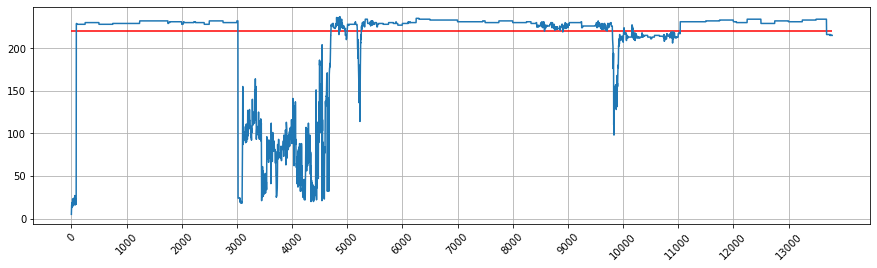

In [166]:
import ast
x=Meta[(Meta['Session']=='SE46')&(Meta['Stage']=='CHO')]
y=x['Values']
y=y.reset_index(drop=True)[0]
y=ast.literal_eval(y)
plt.figure(figsize=(15,4))
plt.plot(y)
plt.hlines(220, 0, len(y), color='r')
plt.grid()
plt.xticks(np.arange(0, len(y), step=1000), rotation=45);



In [154]:
[89, 4705, 11036] , [3020,  9808,  13688]

([77, 5711, 10650], [3473, 8278, 13633])

In [167]:


threshold=220



t_status=0
trial_starts, trial_ends = [[],[]]
i =0
light_list=y
while i <len(light_list):
        light_frame= light_list[i]
        if t_status == 0 and light_frame > threshold:
            trial_starts.append(i)
            t_status = 1   
            

            #If max value drops below 250 then LED is switched off (end trial)
        elif t_status == 1 and light_frame < threshold:
            trial_ends.append(i)
            t_status = 0

        i+=1
print(trial_starts, "\n", trial_ends)

[89, 4705, 4853, 4999, 5256, 8909, 10013, 10160, 11036] 
 [3020, 4848, 4964, 5184, 8908, 9808, 10021, 10176, 13688]


In [130]:
behavioural_video=os.path.join(r'\\172.16.251.125\Inscopix\Francesco\DLC FOLDER\H2211-18-19','2020-02-03 H2211_SE42_WWW_SW3_CHO.flv')

def led_time(behavioural_video):
    """Find frame that an LED is switched on
    INPUT:
    - behavioural_video = the video being analysed
    - stage = if stage is PRE, then it will only log begining of trial
    
    OUTPUT:
    - trial_starts - list containing all trial starts
    - trial_ends - list containing all trial ends"""
    
    #Read in video
    cap = cv2.VideoCapture(behavioural_video)
    light_list=[]
    frame = 1 #Start Frame number
     # find trial start or trial end
    
    duration = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.set(1, 0)
    bkg= cap.read()[1]
    bkg = cv2.cvtColor(bkg, cv2.COLOR_BGR2GRAY)
    
    with tqdm(total=duration-20) as pbar:

            
        for frame in range(duration-20):
            
            cap.set(1, frame+1)
           
            pixels = cap.read()[1] # Read in Pixel values
            pixels=  cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
            pixels = cv2.subtract(pixels,bkg)
            pixels = cv2.blur(pixels,(2,2))

            #Define approximate LED region and extract mean of highest 100 pixel values
            light_region = pixels[350:500][:,200:350]
            light_region2=pixels[550:700][:,1100:1300] 
            light_frame = max(max(np.array(light_region).flatten()), max(np.array(light_region2).flatten())) #Maximum pixel value for region

            light_list.append(light_frame)
            pbar.update()
            
    #if no trial end is detected, use the video end
    
    t_status=0
    trial_starts, trial_ends = [[],[]]
    i =0

    while i <len(light_list):
            light_frame= light_list[i]
            if t_status == 0 and light_frame > 150:
                trial_starts.append(i)
                t_status = 1   
                print(i)
                
                #If max value drops below 250 then LED is switched off (end trial)
            elif t_status == 1 and light_frame < 150:
                trial_ends.append(i)
                t_status = 0
                print(i)
            
            i+=1
            


    if len(trial_starts) != len(trial_ends):
            trial_ends.append(duration)
            
            
    return trial_starts, trial_ends, light_list

t_starts, t_ends, l_list = led_time(behavioural_video) #Call LED function


100%|██████████| 22264/22264 [33:11<00:00, 11.18it/s]

207
5446
5840
5842
5860
5919
5920
5921
5922
5923
5936
5938
5967
5979
5998
6070
6074
6075
6077
6083
6084
6087
6108
6113
6114
6115
6117
6118
6123
6124
6144
6151
6153
6164
6167
6205
6211
6217
6221
6222
6239
6242
6274
6277
6280
6290
6333
6337
6421
6459
6498
6503
6509
6518
6532
6544
6582
6585
6599
6644
6687
6695
6697
6704
6707
6708
6709
6711
7204
7211
7227
7230
7263
7266
7288
7290
7607
7608
7618
7619
7672
7710
7711
7712
7713
7714
7716
7718
7842
7843
7844
7845
8323
8350
8398
13408
13414
13450
13456
13462
13475
13594
13599
13622
13628
14364
14368
14879
14884
14987
14994
15293
15308
15309
15331
15334
15376
15377
15379
15387
15388
15390
15391
15397
15404
15408
15411
15412
15417
15423
15442
15444
15456
15457
15458
15461
15463
15464
15652
15809
15831
15833
15927
15928
16011
16015
16095
16096
16210


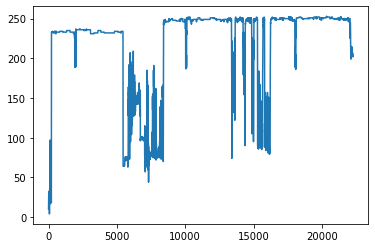

In [132]:
plt.plot(l_list)

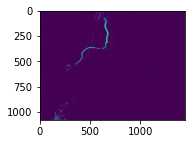

In [129]:
cap = cv2.VideoCapture(behavioural_video)
light_list=[]
frame = 1 #Start Frame number
 # find trial start or trial end

duration = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.set(1, 1)
bkg= cap.read()[1]
bkg = cv2.cvtColor(bkg, cv2.COLOR_BGR2GRAY)

#with tqdm(total=duration-20) as pbar:
frame=15


cap.set(1, frame+1)

pixels = cap.read()[1] # Read in Pixel values
pixels=  cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
pixels = cv2.subtract(pixels,bkg)
pixels = cv2.blur(pixels,(2,2))

#Define approximate LED region and extract mean of highest 100 pixel values
light_region = pixels[350:500][:,200:350]
light_region2=pixels[550:700][:,1100:1300] 
#light_frame = max(max(np.array(light_region).flatten()), max(np.array(light_region2).flatten())) #Maximum pixel value for region

#light_list.append(light_frame)
#pbar.update()
fig=plt.figure(figsize=(5,2))
ax = fig.add_subplot(1,1,1)
ax.imshow(pixels)   

In [37]:
Meta=Meta.sort_values(by=['Session', 'Stage', 'Trial'])

In [39]:

Meta.to_csv(os.path.join(folder_name, 'H2222_SA.csv'), sep =',')